# Shrink or enlarge the domain in Fourier space

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
import time
site.addsitedir('..')
from jax.config import config

config.update("jax_enable_x64", True)

In [2]:
import numpy as np
import jax.numpy as jnp
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project_spatial, project, rotate
from src.interpolate import *
import jax

Text(0.5, 1.0, 'Volume_comp MIP')

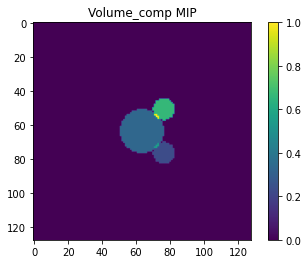

In [3]:
nx = 128
shape = np.array([nx,nx,nx])
dimensions = np.array([20,20,20])

# A volume with components
centres = np.array([[0,0,0], [2, 2, 0], [2, -2, 0]])
radii = np.array([2, 1, 1])
intensities = np.array([10,7,20])

vol = jnp.array(volume_comp(shape, dimensions, centres, radii, intensities, False, 10))
vol_fourier, X, Y, Z, _, _, _ = volume_fourier(jnp.fft.ifftshift(vol), dimensions)

mip_z(vol)
#plt.imshow(v[:,:,int(np.floor(v.shape[2]/2))])
plt.colorbar()
plt.title('Volume_comp MIP')

Assume vol is already in the Fourier domain, but use the Fourier grids from ```volume_fourier```.

In [4]:
x_freq = X[0,:,0]
y_freq = Y[:,0,0]
z_freq = Z[0,0,:]

x_grid = jnp.array([x_freq[1], len(x_freq)])
y_grid = jnp.array([y_freq[1], len(y_freq)])
z_grid = jnp.array([z_freq[1], len(z_freq)])

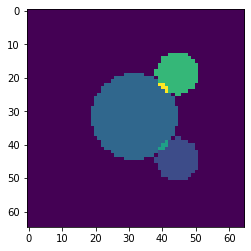

In [5]:
radius = 1.6

vc, x_grid_small, y_grid_small, z_grid_small = rescale_smaller_grid(jnp.fft.ifftshift(vol), x_grid, y_grid, z_grid, radius)
mip_z(jnp.fft.fftshift(vc))

In [6]:
print(vol.shape)
print(vc.shape)

(128, 128, 128)
(65, 65, 65)


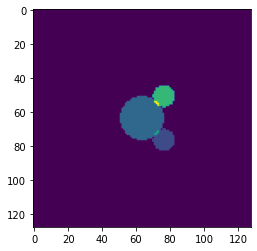

In [7]:
vcc, x_grid_large, y_grid_large, z_grid_large = rescale_larger_grid(vc, x_grid_small, y_grid_small, z_grid_small, vol.shape)
mip_z(jnp.fft.fftshift(vcc))

In [8]:
jnp.sum(jnp.abs(vol - jnp.fft.fftshift(vcc)))

DeviceArray(0., dtype=float64)

In [9]:
print(x_grid)
print(x_grid_small)
print(x_grid_large)

[5.00e-02 1.28e+02]
[DeviceArray(0.05, dtype=float64), 65]
[DeviceArray(0.05, dtype=float64), 128]
